<a href="https://colab.research.google.com/github/Minoo-eml/Statistical_Model_datascience/blob/main/statisticaluni3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** 10 ---------------------------------------------**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
from scipy import stats,signal
from sklearn.linear_model import LinearRegression
from datetime import datetime
import datetime as dt
from scipy import stats,signal
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import het_arch

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [3]:
!pip install arch
from arch import arch_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 8.6 MB/s eta 0:00:00


In [4]:
!pip install rpy2==3.5.1
import rpy2.robjects.packages as rpackages
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)
utils.install_packages('rugarch')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314926 sha256=17e86a40e8423b27bf51c2bf580b8350d236c689460ea8d56031b06a819bdaaf
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


(as ‘lib’ is unspecified)













































































































	‘/tmp/RtmpyGMyPV/downloaded_packages’



<rpy2.rinterface_lib.sexp.NULLType object at 0x7a401f8e8bc0> [RTYPES.NILSXP]

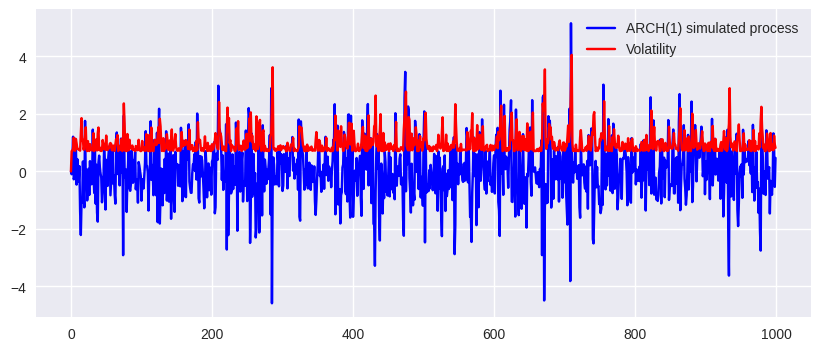

In [5]:
np.random.seed(42)

# Simulating an ARCH(1) process
n = 1000
w = np.random.normal(size=n) # samples from a normal (Gaussian) distribution
omega = 0.5
alpha_1 = 0.6

Y = np.zeros_like(w)
sigsq = np.zeros_like(w)

for t in range(1, n):
    sigsq[t] = omega + alpha_1*Y[t-1]**2
    Y[t] = w[t] * np.sqrt(sigsq[t])


plt.figure(figsize=(10,4))
plt.plot(Y, '-b', label = 'ARCH(1) simulated process')
plt.plot(np.sqrt(sigsq), '-r', label = 'Volatility')
plt.legend();

# Remember: A time series exhibiting conditional heteroscedasticity — or autocorrelation in the squared series — is said to have ARCH effects


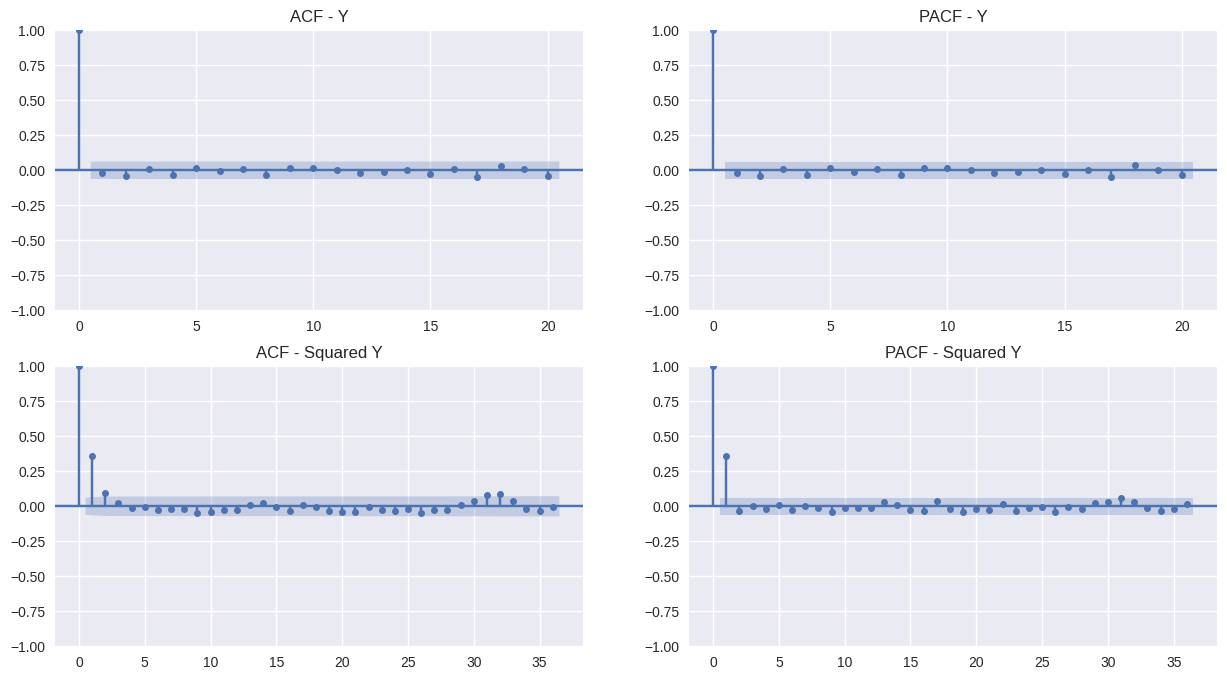

In [6]:
# Visualize ACF and PACF plots -> if ARCH effect is present, the ACF/PACF plots of the second powers will likely show correlation
# Thus we want to examine whether there is a serial correlation in the squared time series
Y = np.array(Y)
fig, ax = plt.subplots(2,2, figsize=(15,8))
plot_acf(Y, lags=20, ax=ax[0,0],title='ACF - Y');
plot_pacf(Y, lags=20, ax=ax[0,1],title='PACF - Y');

plot_acf(Y**2, lags=36, ax=ax[1,0], title='ACF - Squared Y');
plot_pacf(Y**2, lags=36, ax=ax[1,1],title='PACF - Squared Y');


In [7]:
# Test for ARCH effect
# Engle's ARCH test is a Lagrange multiplier test to assess the significance of ARCH effects
test_het = het_arch(Y**2, nlags=10, store=False)
test_het

# Output
# lm  – Lagrange multiplier test statistic
# lmpval – p-value for Lagrange multiplier test
# fval – fstatistic for F test, alternative version of the same test based on F-test for the parameter restriction
# fpval  – pvalue for F test

# H0： ARCH Effect not exists
# H1：ARCH Effect exists


(44.406022596866094,
 2.7824183076534553e-06,
 4.597480225257174,
 2.07703696330141e-06)

In [8]:
# Fit the model
test_size = 100
train = Y[:-test_size]
model = arch_model(train, mean = 'constant', vol = 'ARCH', dist = 'normal', rescale = 'FALSE', p = 1) # we could select mean = 'zero'
model_fit = model.fit()
print(model_fit.summary)

# help(arch_model)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4103.549332766999
Iteration:      2,   Func. Count:     12,   Neg. LLF: 818777.2180051489
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1219.5230739039312
Iteration:      4,   Func. Count:     23,   Neg. LLF: 1199.9926563060753
Iteration:      5,   Func. Count:     27,   Neg. LLF: 1199.9924459859708
Iteration:      6,   Func. Count:     32,   Neg. LLF: 1199.9900647533568
Iteration:      7,   Func. Count:     36,   Neg. LLF: 1199.9900635337265
Iteration:      8,   Func. Count:     39,   Neg. LLF: 1199.9900635337303
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1199.9900635337265
            Iterations: 8
            Function evaluations: 39
            Gradient evaluations: 8
<bound method ARCHModelResult.summary of                       Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:

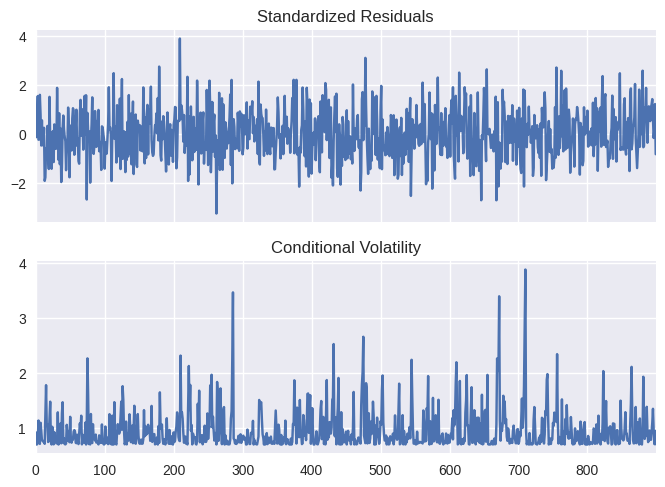

In [9]:
# To quickly visualize the standardized residuals and conditional volatility
model_fit.plot();

# Standardized Residuals = model_fit.resid/model_fit.conditional_volatility

# Conditional volatility is the volatility of a random variable given (i.e. conditioning on) some extra information.
# In the ARCH model the conditional volatility is conditioned on past values of itself



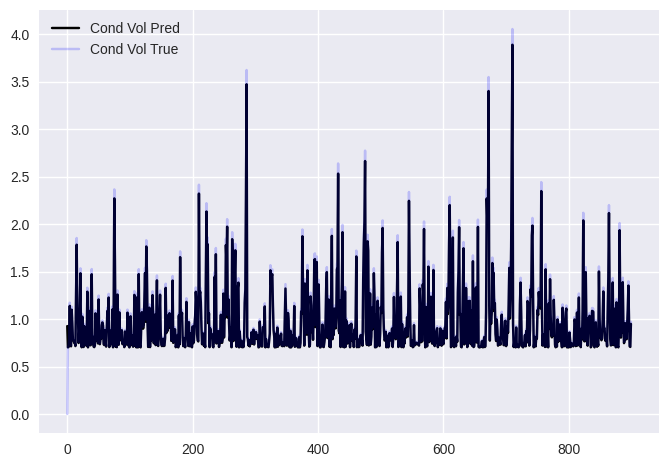

In [10]:
# Comparing conditional volatility
cond_vol_pred = model_fit.conditional_volatility
cond_vol_sim = np.sqrt(sigsq)[:-test_size]
plt.plot(cond_vol_pred,'-k',label='Cond Vol Pred')
plt.plot(cond_vol_sim,'-b',label='Cond Vol True',alpha=0.2)
plt.legend();

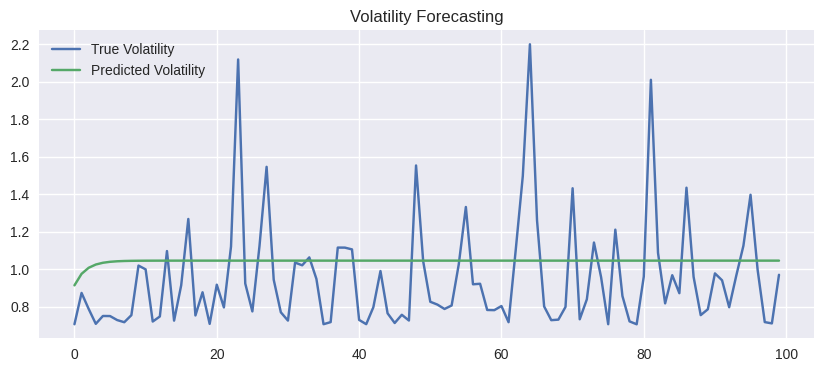

In [11]:
# Forecasting in the future
predictions = model_fit.forecast(horizon=100)

plt.figure(figsize=(10,4))
plt.plot(cond_vol_sim[-test_size:], label='True Volatility')
plt.plot(np.sqrt(predictions.variance.values[-1, :]),label='Predicted Volatility')
plt.title('Volatility Forecasting')
plt.legend();

In [12]:
# Looking at predictions.variance
predictions.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
899,0.836397,0.952536,1.016445,1.051613,1.070965,1.081614,1.087474,1.090698,1.092473,1.093449,...,1.094644,1.094644,1.094644,1.094644,1.094644,1.094644,1.094644,1.094644,1.094644,1.094644


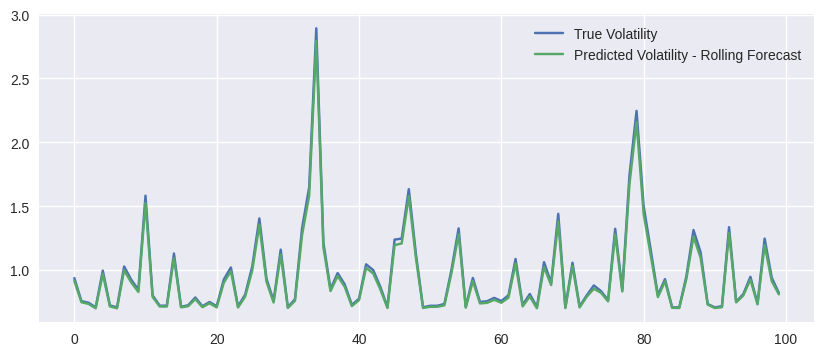

In [13]:
# Forecasting with rolling predictions (one-step ahead rolling forecast)
rolling_predictions = []
test_size = 100

for i in range(test_size):
    train = Y[:-(test_size-i)]
    model = arch_model(train, mean = 'constant', vol = 'ARCH', dist = 'normal', rescale = 'FALSE',p = 1, q = 0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[0,:]))
    #print(pred.variance)

plt.figure(figsize=(10,4))
true_vol = np.sqrt(sigsq)[-test_size:]
plt.plot(true_vol,label='True Volatility')
plt.plot(rolling_predictions, label='Predicted Volatility - Rolling Forecast')
plt.legend();

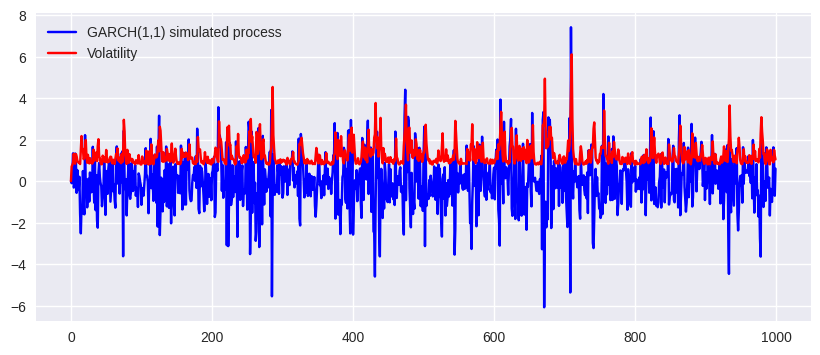

In [14]:
np.random.seed(42)

# Simulate GARCH(1,1) process
n = 1000
w = np.random.normal(size=n)
omega = 0.5
alpha_1 = 0.6
beta_1 = 0.2

Y = np.zeros_like(w)
sigsq = np.zeros_like(w)

for t in range(1, n):
   sigsq[t] = omega + alpha_1*Y[t-1]**2 + beta_1*sigsq[t-1]
   Y[t] = w[t] * np.sqrt(sigsq[t])

plt.figure(figsize=(10,4))
plt.plot(Y, '-b', label = 'GARCH(1,1) simulated process')
plt.plot(np.sqrt(sigsq), '-r', label = 'Volatility')
plt.legend();

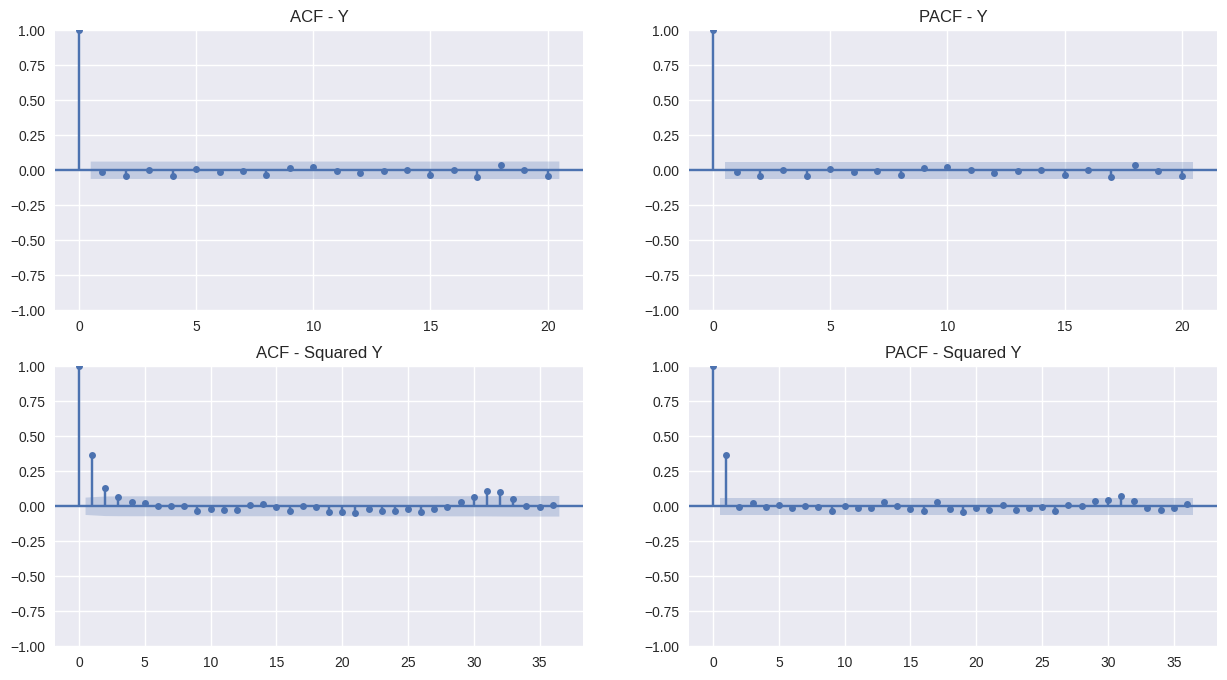

In [15]:
# Visualize ACF and PACF plots
fig, ax = plt.subplots(2,2, figsize=(15,8))
plot_acf(Y, lags=20, ax=ax[0,0],title='ACF - Y');
plot_pacf(Y, lags=20, ax=ax[0,1],title='PACF - Y');

plot_acf(np.array(Y)**2, lags=36, ax=ax[1,0], title='ACF - Squared Y');
plot_pacf(np.array(Y)**2, lags=36, ax=ax[1,1],title='PACF - Squared Y');

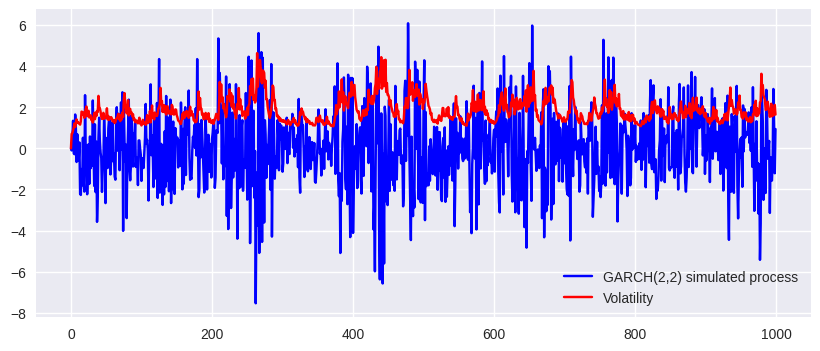

In [16]:
np.random.seed(42)

# Simulate GARCH(2,2) process
n = 1000
w = np.random.normal(size=n)
omega = 0.5
alpha_1 = 0.1
alpha_2 = 0.3
beta_1 = 0.1
beta_2 = 0.4

Y = np.zeros_like(w)
sigsq = np.zeros_like(w)

for t in range(1, n):
    sigsq[t] = omega + alpha_1*Y[t-1]**2 +alpha_2*Y[t-2]**2+ beta_1*sigsq[t-1] +beta_2*sigsq[t-2]
    Y[t] = w[t] * np.sqrt(sigsq[t])


plt.figure(figsize=(10,4))
plt.plot(Y, '-b', label = 'GARCH(2,2) simulated process')
plt.plot(np.sqrt(sigsq), '-r', label = 'Volatility')
plt.legend();

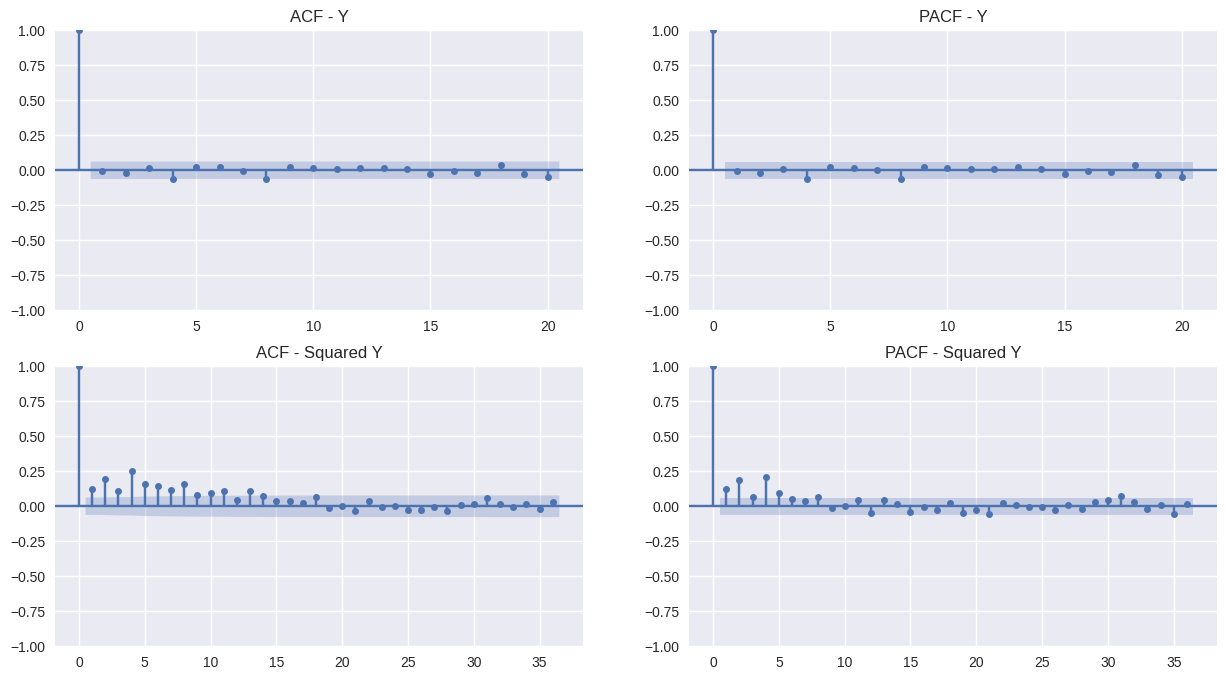

In [17]:
# Visualize ACF and PACF plots
Y = np.array(Y)
fig, ax = plt.subplots(2,2, figsize=(15,8))
plot_acf(Y, lags=20, ax=ax[0,0],title='ACF - Y');
plot_pacf(Y, lags=20, ax=ax[0,1],title='PACF - Y');

plot_acf(Y**2, lags=36, ax=ax[1,0], title='ACF - Squared Y');
plot_pacf(Y**2, lags=36, ax=ax[1,1],title='PACF - Squared Y');

In [18]:
# Test for ARCH effect
test_het = het_arch(Y**2, nlags=None, store=False)
print('pval:', test_het[1])

pval: 1.1969429285311852e-16


Iteration:      1,   Func. Count:      8,   Neg. LLF: 119096.80135095738
Iteration:      2,   Func. Count:     17,   Neg. LLF: 141703.62407740258
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1848.3878517846663
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1831.0587216326699
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1787.914633672867
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1827.8258314925145
Iteration:      7,   Func. Count:     59,   Neg. LLF: 1773.11877709085
Iteration:      8,   Func. Count:     67,   Neg. LLF: 1772.5819914439905
Iteration:      9,   Func. Count:     75,   Neg. LLF: 1772.387336524952
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1772.1566826736876
Iteration:     11,   Func. Count:     90,   Neg. LLF: 1772.156604728445
Iteration:     12,   Func. Count:     97,   Neg. LLF: 1772.1566040374487
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1772.1566040374487
            Iteratio

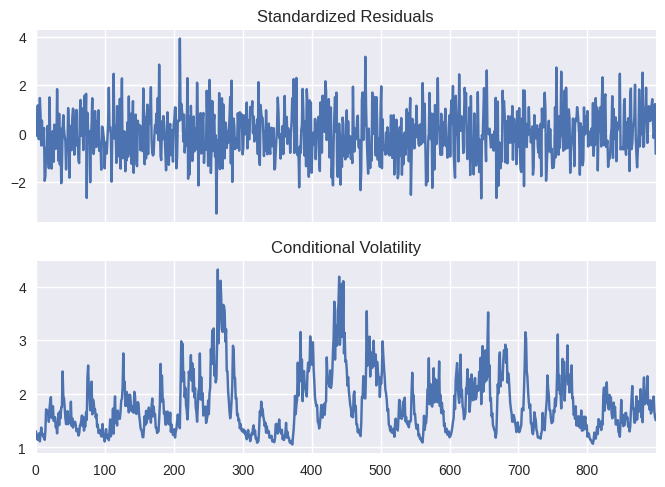

In [19]:
# Fit the model
test_size = 100
train = Y[:-test_size]
model = arch_model(train, mean = 'constant', vol = 'GARCH', dist = 'normal', rescale = 'FALSE', p = 2, q = 2)
model_fit = model.fit()
print(model_fit.summary)

model_fit.plot();

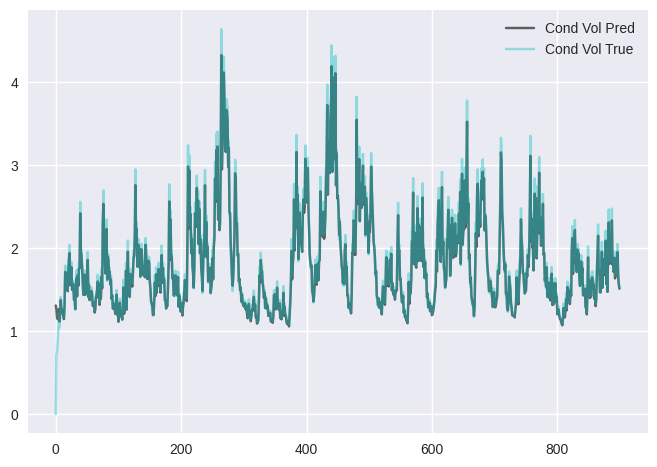

In [20]:
# Comparing conditional volatility
cond_vol_sim = np.sqrt(sigsq)
cond_vol_pred = model_fit.conditional_volatility
cond_vol_sim_train = cond_vol_sim[:-test_size]
plt.plot(cond_vol_pred,'-k',label='Cond Vol Pred',alpha=0.6)
plt.plot(cond_vol_sim_train,'-c',label='Cond Vol True', alpha=0.4)
plt.legend();

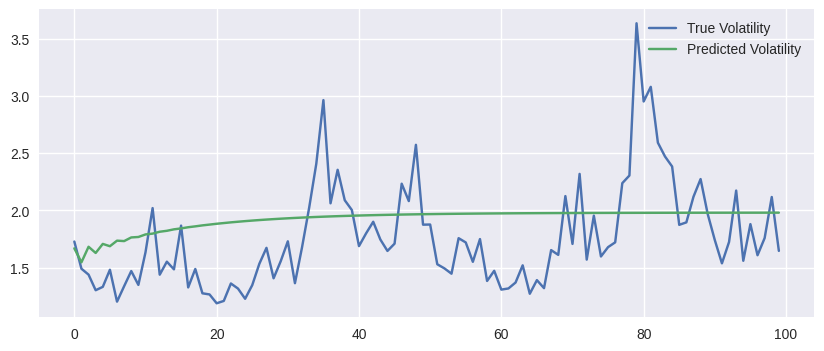

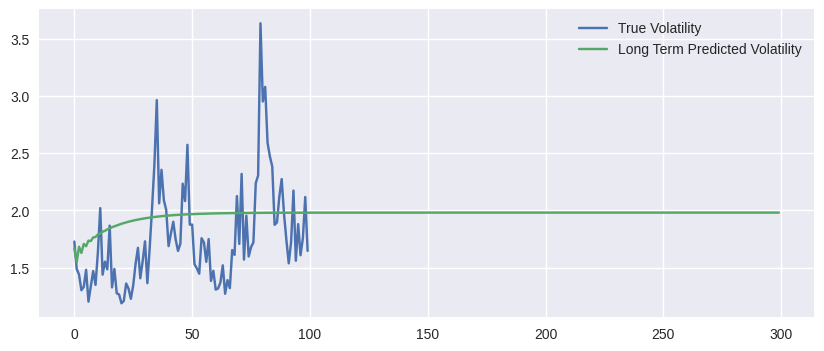

In [21]:
# Forecasting in the future - Short and Long Horizon
predictions = model_fit.forecast(horizon=100)
plt.figure(figsize=(10,4))
plt.plot(cond_vol_sim[-test_size:], label='True Volatility')
plt.plot(np.sqrt(predictions.variance.values[0,:]),label='Predicted Volatility')
plt.legend();

predictions_long_term = model_fit.forecast(horizon=300)
plt.figure(figsize=(10,4))
plt.plot(cond_vol_sim[-test_size:], label='True Volatility')
plt.plot(np.sqrt(predictions_long_term.variance.values[0, :]),label='Long Term Predicted Volatility')
plt.legend();


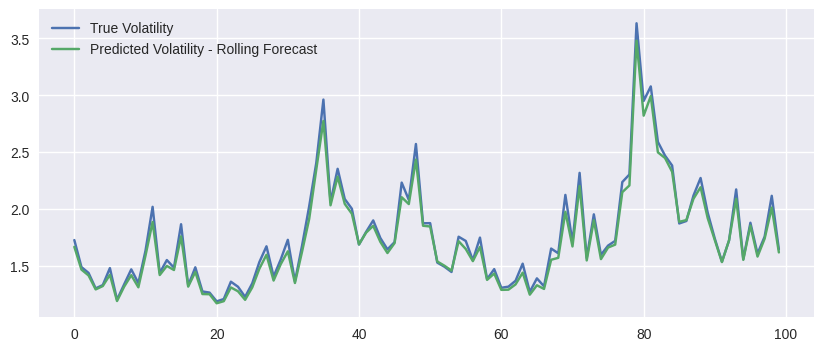

In [22]:
# Forecasting with rolling predictions
rolling_predictions = []
test_size = 100

for i in range(test_size):
    train = Y[:-(test_size-i)]
    model = arch_model(train, mean = 'constant', vol = 'GARCH', dist = 'normal', rescale = 'FALSE', p = 2, q = 2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[0,:]))

plt.figure(figsize=(10,4))
true, = plt.plot(cond_vol_sim[-test_size:],label='True Volatility')
preds, = plt.plot(rolling_predictions, label='Predicted Volatility - Rolling Forecast')
plt.legend();

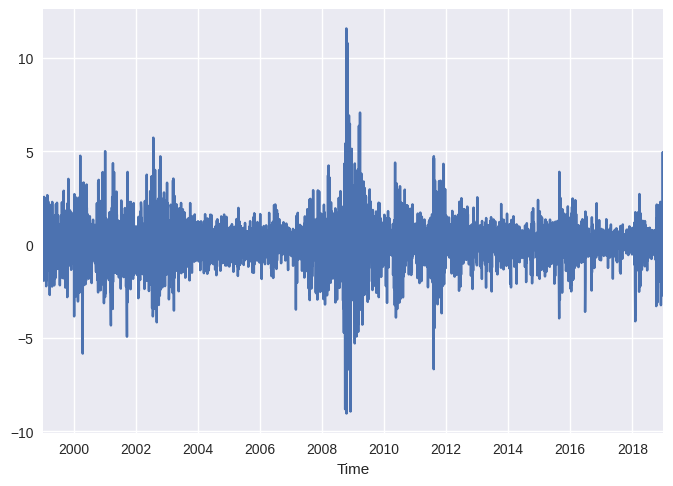

In [23]:
# Example 1 - Real Data (S&P500)
import arch.data.sp500

data = arch.data.sp500.load()
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()
plt.plot(returns)
plt.xlabel('Time')
plt.xlim(returns.index.min(), returns.index.max());

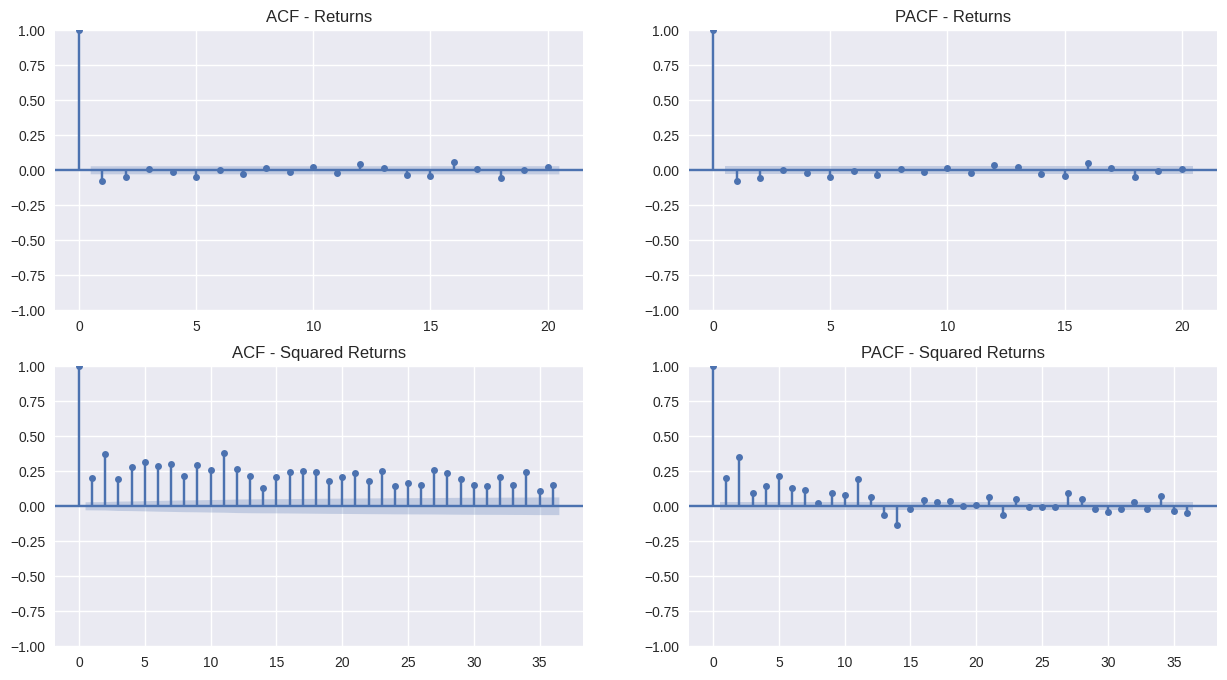

In [24]:
# Divide data into train and test
returns_train = returns[:-365]
returns_test = returns[-365:]

fig, ax = plt.subplots(2,2, figsize=(15,8))
plot_acf(returns_train, lags=20, ax=ax[0,0],title='ACF - Returns');
plot_pacf(returns_train, lags=20, ax=ax[0,1],title='PACF - Returns');
plot_acf(returns_train**2, lags=36, ax=ax[1,0], title='ACF - Squared Returns');
plot_pacf(returns_train**2, lags=36, ax=ax[1,1],title='PACF - Squared Returns');

In [25]:
# Test for ARCH effect
test_het = het_arch(returns_train**2, nlags=10, store=False)
print('pval:', test_het[1])

pval: 1.0709592366234331e-128


In [26]:
# Fit GARCH(2,2) model
model = arch_model(returns_train, mean = 'constant', vol = 'GARCH', dist = 'normal', rescale = 'FALSE', p = 2, q = 2)
model_fit = model.fit()
print(model_fit.summary)

#plt.plot(returns_train.values,'-k')
#plt.plot(model_fit.conditional_volatility.values,'-r')


Iteration:      1,   Func. Count:      8,   Neg. LLF: 55721.17796663119
Iteration:      2,   Func. Count:     20,   Neg. LLF: 26677.88226546003
Iteration:      3,   Func. Count:     31,   Neg. LLF: 9494.991688639479
Iteration:      4,   Func. Count:     41,   Neg. LLF: 102753.63626044053
Iteration:      5,   Func. Count:     49,   Neg. LLF: 6696.385558979417
Iteration:      6,   Func. Count:     57,   Neg. LLF: 6549.982025079726
Iteration:      7,   Func. Count:     65,   Neg. LLF: 6825.682407205893
Iteration:      8,   Func. Count:     73,   Neg. LLF: 6545.082437489265
Iteration:      9,   Func. Count:     81,   Neg. LLF: 6537.644908432543
Iteration:     10,   Func. Count:     89,   Neg. LLF: 6520.5646421073525
Iteration:     11,   Func. Count:     96,   Neg. LLF: 6520.561731138536
Iteration:     12,   Func. Count:    103,   Neg. LLF: 6520.561642907242
Iteration:     13,   Func. Count:    110,   Neg. LLF: 6520.561639741682
Iteration:     14,   Func. Count:    116,   Neg. LLF: 6520.561

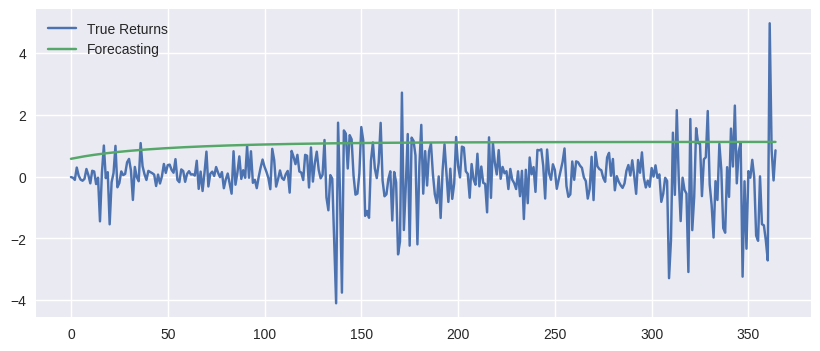

In [27]:
# Forecasting
predictions = model_fit.forecast(horizon=365)
plt.figure(figsize=(10,4))
plt.plot(returns_test.values, label='True Returns')
plt.plot(np.sqrt(predictions.variance.values[-1, :]),label='Forecasting')
plt.legend();


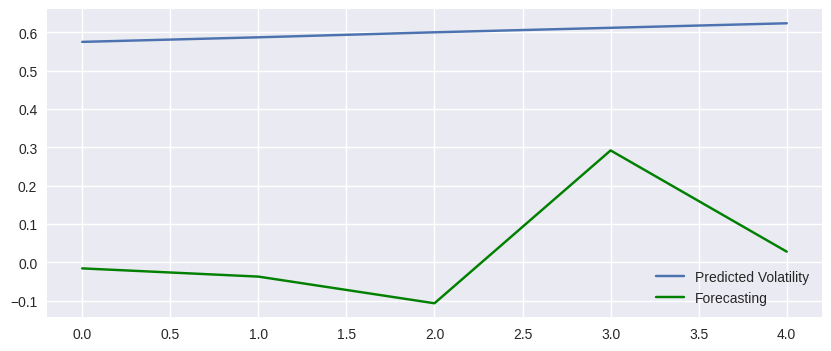

In [28]:
# Forecasting - Short Term
predictions = model_fit.forecast(horizon=5)
plt.figure(figsize=(10,4))
plt.plot(np.sqrt(predictions.variance.values[-1, :5]),label='Predicted Volatility')
plt.plot(returns_test[:5].values,'-g',label='Forecasting')
plt.legend();

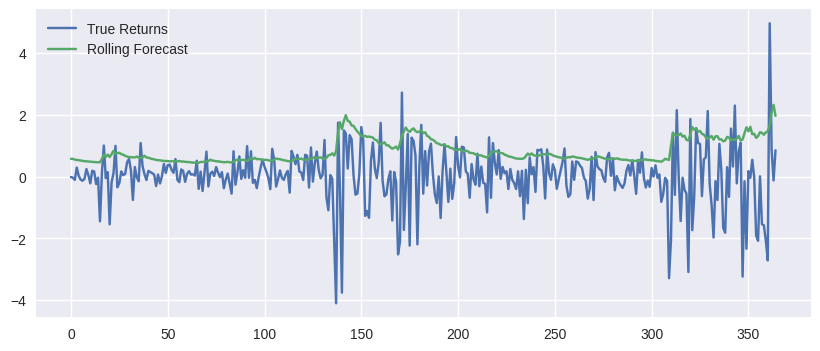

In [29]:
# Forecasting with rolling predictions
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, mean = 'constant', vol = 'GARCH', dist = 'normal', rescale = 'FALSE', p = 2, q = 2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

plt.figure(figsize=(10,4))
plt.plot(returns_test.values,label='True Returns')
plt.plot(rolling_predictions, label='Rolling Forecast')
plt.legend();

# ** 11 ----------------------------------------------**

In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import sklearn
from scipy import stats,signal
from sklearn.linear_model import LinearRegression
from datetime import datetime
import datetime as dt
from scipy import stats,signal
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Example 1 - Real data with multiple variables
# Let's consider the real gross domestic product (realgdp) and real consumption (realcons) in the United States from 1959 to 2009 (quarterly data)
macro_econ_data = sm.datasets.macrodata.load_pandas().data
macro_econ_data.head(6)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55


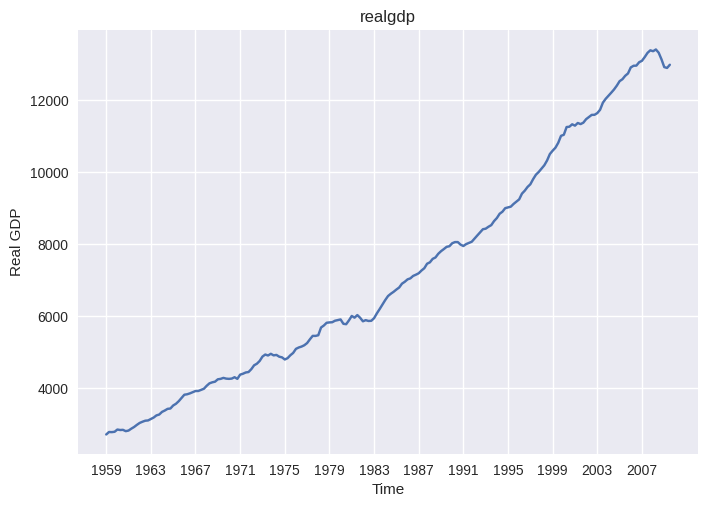

In [31]:
# Plot - Real GDP
plt.plot(macro_econ_data['realgdp'])
plt.xlabel('Time')
plt.ylabel('Real GDP')
plt.title('realgdp')
plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4));

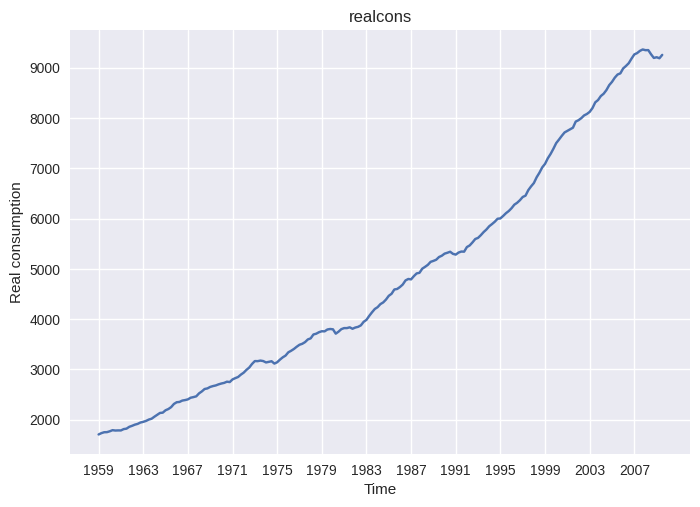

In [32]:
# Plot - Real Consumption
plt.plot(macro_econ_data['realcons'])
plt.xlabel('Time')
plt.ylabel('Real consumption')
plt.title('realcons')
plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4));

In [33]:
# Divide into train and test sets
data = macro_econ_data[['realgdp', 'realcons']]
data_train = data[:179]
data_test = data[179:] # last 24 points as test set

In [34]:
# Stationarity tests - As the original time series are non-stationary, we proceed with a first order differencing
data_train_diff = data_train[['realgdp', 'realcons']].diff().dropna()

for col in data_train.columns:
  result_ADF = adfuller(data_train_diff[col])
  print(col)
  print('ADF p-value', result_ADF[1])

print('---------------------------')
for col in data_train.columns:
  result_KPSS = kpss(data_train_diff[col], regression='ct', nlags='auto', store=True)
  print(col)
  print('KPSS p-value', result_KPSS[1])


# Time series is stationary -> we do not have to perform further differencing on the data

realgdp
ADF p-value 6.304092675534595e-07
realcons
ADF p-value 0.00795844441900948
---------------------------
realgdp
KPSS p-value 0.1
realcons
KPSS p-value 0.1


In [35]:
# Granger causality test on stationary signals (thus on the differenced data)
# This test helps us validating the hypothesis that two time series impact on each other.
# If a variable X is found to be helpful for predicting another variable Y, then X is said to Granger-cause Y; otherwise it
# is said to fail to Granger-cause Y.
# So a variable X Granger-causes another variable Y if Y's predictions based on its own past values and on the past values of X are better than Y's predictions based only on Y's past values


from statsmodels.tsa.stattools import grangercausalitytests
# The null hypothesis for 'grangercausalitytests' is that the time series in
# the second column, x2, does NOT Granger cause the time series in the first
# column, x1.

print('realcons Granger-causes realgdp?')
print('------------------')
granger_1 = grangercausalitytests(data_train_diff[['realgdp', 'realcons']], 12)

print('\nrealgdp Granger-causes realcons?')
print('------------------')
granger_2 = grangercausalitytests(data_train_diff[['realcons', 'realgdp']], 12)

realcons Granger-causes realgdp?
------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=41.9326 , p=0.0000  , df_denom=174, df_num=1
ssr based chi2 test:   chi2=42.6556 , p=0.0000  , df=1
likelihood ratio test: chi2=38.2163 , p=0.0000  , df=1
parameter F test:         F=41.9326 , p=0.0000  , df_denom=174, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=21.3246 , p=0.0000  , df_denom=171, df_num=2
ssr based chi2 test:   chi2=43.8962 , p=0.0000  , df=2
likelihood ratio test: chi2=39.1902 , p=0.0000  , df=2
parameter F test:         F=21.3246 , p=0.0000  , df_denom=171, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=14.6958 , p=0.0000  , df_denom=168, df_num=3
ssr based chi2 test:   chi2=45.9244 , p=0.0000  , df=3
likelihood ratio test: chi2=40.7811 , p=0.0000  , df=3
parameter F test:         F=14.6958 , p=0.0000  , df_denom=168, df_num=3

Granger Causality
number of lags (no zero

In [38]:
# Optimize VAR model
results = []
for p in range(1,6,1):
        model = VARMAX(data_train_diff, order=(p,0)).fit(disp=False)
        aic = model.aic
        results.append([p, aic])

result_df = pd.DataFrame(results)
result_df.columns = ['p', 'AIC']
opt = result_df[result_df['AIC']==result_df['AIC'].min()]
display(opt)


,p,AIC
2,3,3487.887012


In [39]:
# Automatic VAR model selection
model = VAR(data_train_diff)
x = model.select_order(maxlags=4)
x.summary()

,AIC,BIC,FPE,HQIC
0,14.36,14.40,1.730e+06,14.38
1,14.05,14.16,1.268e+06,14.10
2,14.00,14.19,1.207e+06,14.08
3,13.90*,14.16*,1.090e+06*,14.00*
4,13.94,14.26,1.130e+06,14.07


In [40]:
# Fit the optimal VAR model
best_model = VARMAX(data_train_diff, order=(3,0)).fit()
print(best_model.summary())

                              Statespace Model Results                             
Dep. Variable:     ['realgdp', 'realcons']   No. Observations:                  178
Model:                              VAR(3)   Log Likelihood               -1726.944
                               + intercept   AIC                           3487.887
Date:                     Fri, 09 Feb 2024   BIC                           3541.977
Time:                             14:57:20   HQIC                          3509.822
Sample:                                  0                                         
                                     - 178                                         
Covariance Type:                       opg                                         
Ljung-Box (L1) (Q):             0.00, 0.16   Jarque-Bera (JB):          9.41, 20.39
Prob(Q):                        0.97, 0.69   Prob(JB):                   0.01, 0.00
Heteroskedasticity (H):         1.97, 2.70   Skew:                       0.2

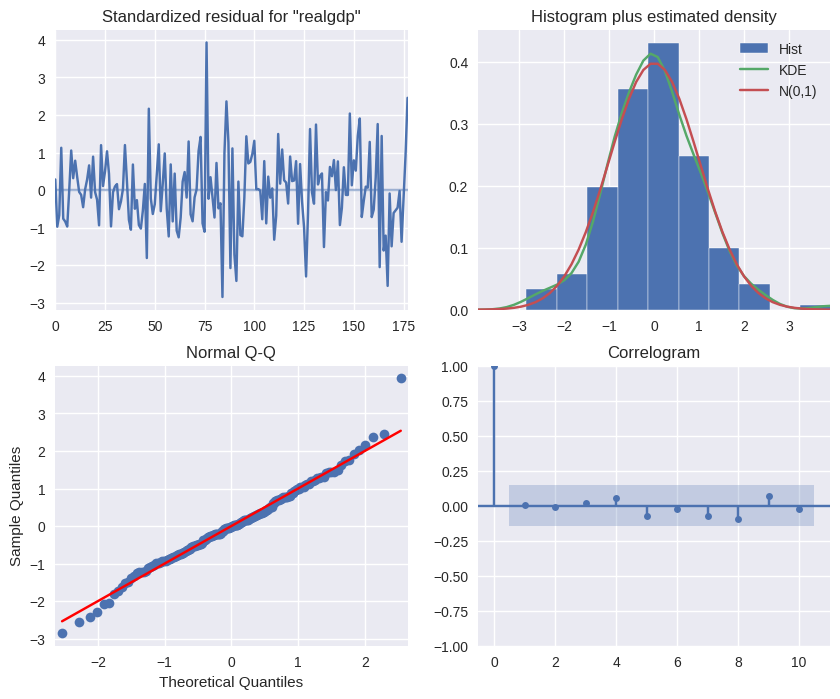

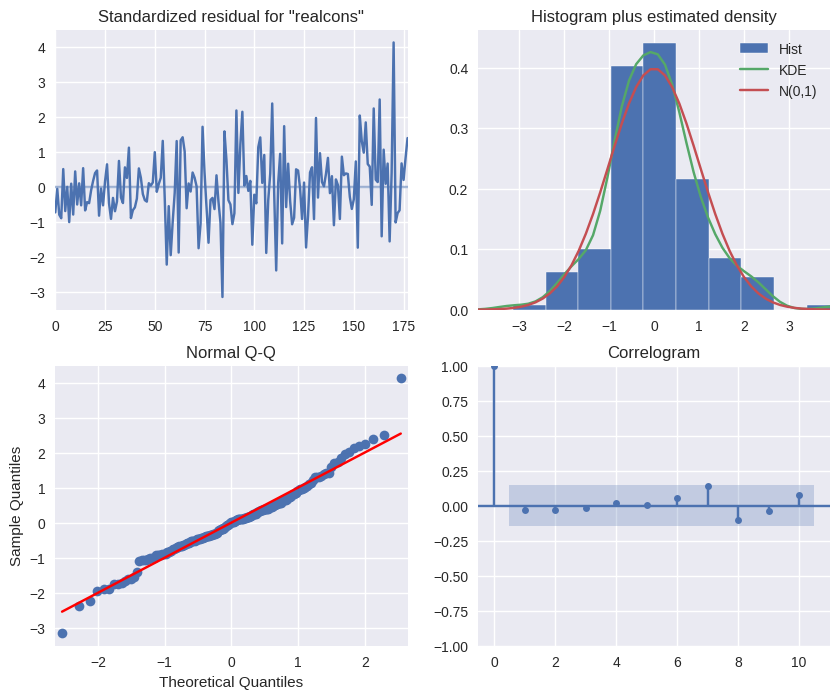

In [41]:
# Plot diagnostic for realgdp
best_model.plot_diagnostics(figsize=(10,8), variable=0);

# Plot diagnostic for realcons
best_model.plot_diagnostics(figsize=(10,8), variable=1);

In [42]:
# Forecast
predictions = best_model.get_prediction(start=data_test.index[0], end=data_test.index[-1])
pred_realgdp = predictions.predicted_mean['realgdp']
pred_realcons = predictions.predicted_mean['realcons']
predictions.summary_frame()

realgdp,mean,mean_se,mean_ci_lower,mean_ci_upper
179,106.617102,48.842971,10.886638,202.347566
180,78.415937,51.199513,-21.933264,178.765137
181,84.362679,52.016016,-17.586840,186.312198
182,72.711561,53.092827,-31.348467,176.771589
183,72.852079,53.509999,-32.025592,177.729751
184,69.829484,53.804269,-35.624945,175.283912
185,66.602781,54.093525,-39.418579,172.624142
186,64.466056,54.245404,-41.852982,170.785094
187,62.985278,54.356469,-43.551443,169.521999
188,60.930399,54.448643,-45.786981,167.647780


In [43]:
# Invert differencing
def invert_differencing(df_train, df_forecast):
    forecasting =  pd.DataFrame()
    df_fc = predictions
    columns = df_train.columns
    for col in columns:
         forecasting[col] = df_train[col].iloc[-1] + (df_fc.predicted_mean[col]).cumsum()
    return forecasting

df_results = invert_differencing(data_train, predictions)
df_results


,realgdp,realcons
179,12042.078102,8380.945358
180,12120.494039,8445.984573
181,12204.856718,8500.206877
182,12277.568279,8554.579155
183,12350.420358,8607.624724
184,12420.249842,8655.871024
185,12486.852624,8703.821755
186,12551.318680,8750.102312
187,12614.303958,8794.432684
188,12675.234357,8838.141348


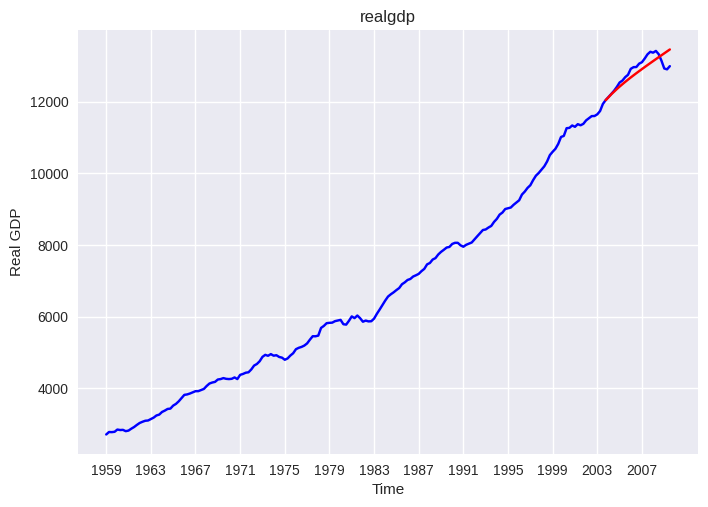

In [44]:
# Visualize the results - GDP
plt.plot(data['realgdp'],'-b')
plt.plot(df_results['realgdp'],'-r')
plt.xlabel('Time')
plt.ylabel('Real GDP')
plt.title('realgdp')
plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4));

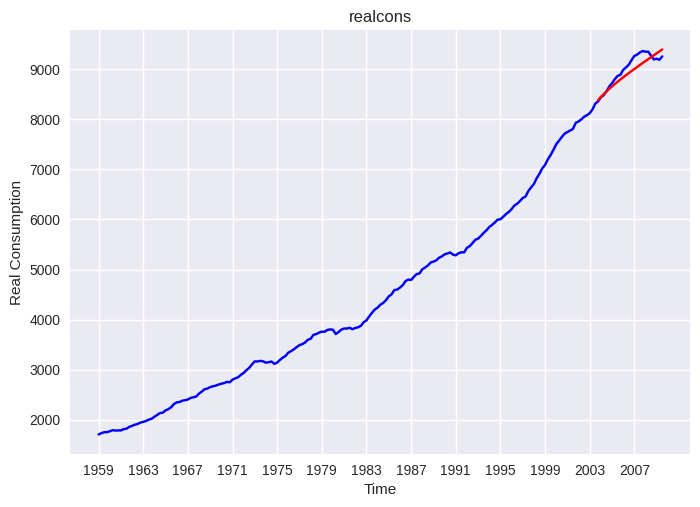

In [45]:
# Visualize the results - Cons
plt.plot(data['realcons'],'-b')
plt.plot(df_results['realcons'],'-r')
plt.xlabel('Time')
plt.ylabel('Real Consumption')
plt.title('realcons')
plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4));

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfc
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8
...,...,...,...,...,...,...,...,...
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0


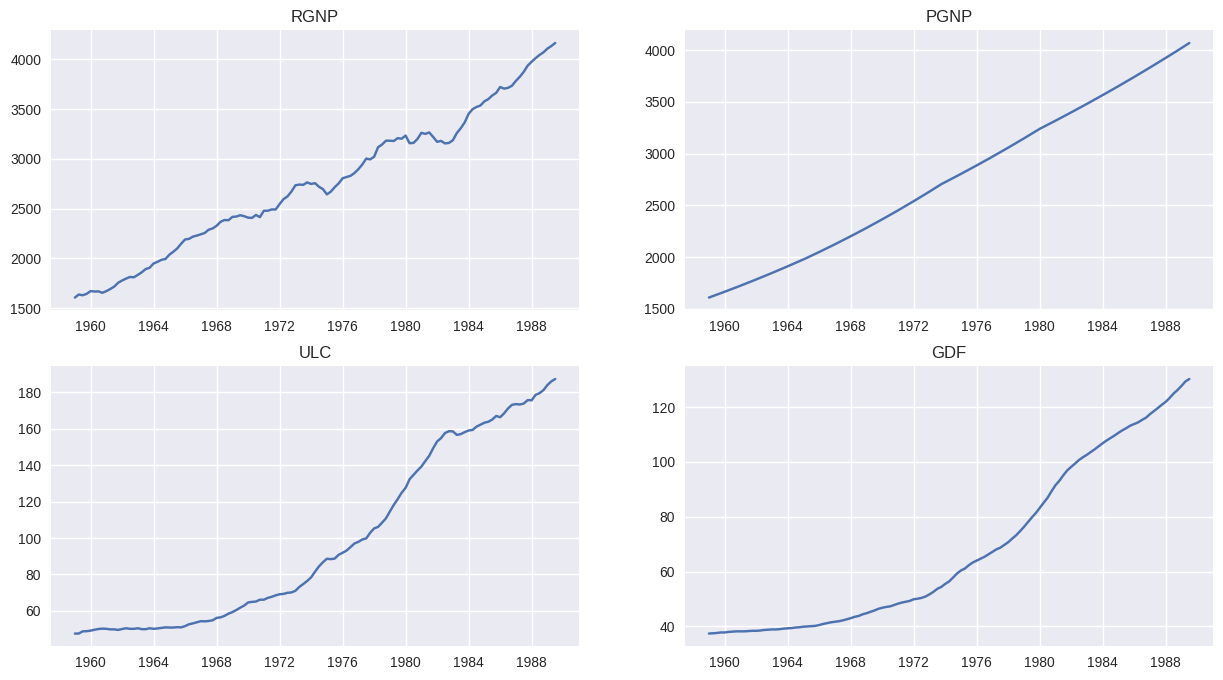

In [46]:
# Example 2 - Real data with more variables
# Four variables to consider in this example among the quarterly data:
# rgnp = Real GNP
# pgnp = Potential real GNP
# ulc  = Unit labor cost
# gdf = Fixed weight GNP deflator

data_all = pd.read_csv('/content/GNP_data.csv',sep=',',parse_dates=['date'], index_col='date')
display(data_all)
data = data_all[['rgnp', 'pgnp', 'ulc','gdf']]

fig, ax = plt.subplots(2, 2, figsize=(15,8))
ax[0,0].plot(data['rgnp']),ax[0,0].set_title('RGNP')
ax[0,1].plot(data['pgnp']),ax[0,1].set_title('PGNP')
ax[1,0].plot(data['ulc']), ax[1,0].set_title('ULC')
ax[1,1].plot(data['gdf']), ax[1,1].set_title('GDF');

# Divide into train and test sets
test_size = 12
data_train = data.iloc[:-test_size]
data_test = data.iloc[-test_size:]

In [47]:
# The original time series are clearly non-stationary -> First Difference
data_train_diff = data_train.diff().dropna()

# Test stationarity - ADF
for i in range(data_train_diff.shape[1]):
    result_ADF = adfuller(data_train_diff[data_train_diff.columns[i]])
    print('ADF for', data_train_diff.columns[i])
    print('ADF p-value:', result_ADF[1])

print('-----------------')
# Test stationarity - KPSS
for i in range(data_train_diff.shape[1]):
    result_KPSS = kpss(data_train_diff[data_train_diff.columns[i]], regression='ct', nlags='auto', store=True)
    print('KPSS for', data_train_diff.columns[i])
    print('KPSS p-value:', result_KPSS[1])

# Some time series are still non stationary -> we do have to perform further differencing on the data

ADF for rgnp
ADF p-value: 6.87670453639116e-06
ADF for pgnp
ADF p-value: 0.30096499732977133
ADF for ulc
ADF p-value: 0.10848151681858575
ADF for gdf
ADF p-value: 0.32726132761933413
-----------------
KPSS for rgnp
KPSS p-value: 0.1
KPSS for pgnp
KPSS p-value: 0.01
KPSS for ulc
KPSS p-value: 0.07259006745124069
KPSS for gdf
KPSS p-value: 0.05244404448421005


In [48]:
# Second-order Differencing
data_train_diff2d = data_train_diff.diff().dropna()

# Test stationarity - ADF
for i in range(data_train_diff2d.shape[1]):
    result_ADF = adfuller(data_train_diff2d[data_train_diff2d.columns[i]])
    print('ADF for', data_train_diff2d.columns[i])
    print('ADF p-value:', result_ADF[1])

print('-----------------')
# Test stationarity - KPSS
for i in range(data_train_diff2d.shape[1]):
    result_KPSS = kpss(data_train_diff2d[data_train_diff2d.columns[i]], regression='ct', nlags='auto', store=True)
    print('KPSS for', data_train_diff2d.columns[i])
    print('KPSS p-value:', result_KPSS[1])

ADF for rgnp
ADF p-value: 8.135100859217454e-14
ADF for pgnp
ADF p-value: 6.368504422365968e-19
ADF for ulc
ADF p-value: 3.9331296942612655e-18
ADF for gdf
ADF p-value: 1.6031640991499007e-17
-----------------
KPSS for rgnp
KPSS p-value: 0.1
KPSS for pgnp
KPSS p-value: 0.1
KPSS for ulc
KPSS p-value: 0.1
KPSS for gdf
KPSS p-value: 0.1


In [49]:
# Granger causality on stationary data
def grangers_causation(data, name_variables, test, verbose=False):
    df = pd.DataFrame(np.zeros((len(name_variables), len(name_variables))), columns=name_variables, index=name_variables)
    for c in df.columns:
        for r in df.columns:
            test_result = grangercausalitytests(data[[r, c]], [12], verbose=False)
            p_values = round(test_result[12][0][test][1],4)
            df.loc[r,c] = p_values
    df.columns = [var + '_x' for var in name_variables]
    df.index = [var + '_y' for var in name_variables]
    return df

grangers_causation(data_train_diff2d,data_train_diff2d.columns,test='ssr_chi2test')

,rgnp_x,pgnp_x,ulc_x,gdf_x
rgnp_y,1.0000,0.0410,0.0000,0.0003
pgnp_y,0.0010,1.0000,0.4064,0.0102
ulc_y,0.0000,0.0005,1.0000,0.0000
gdf_y,0.0145,0.0000,0.1633,1.0000


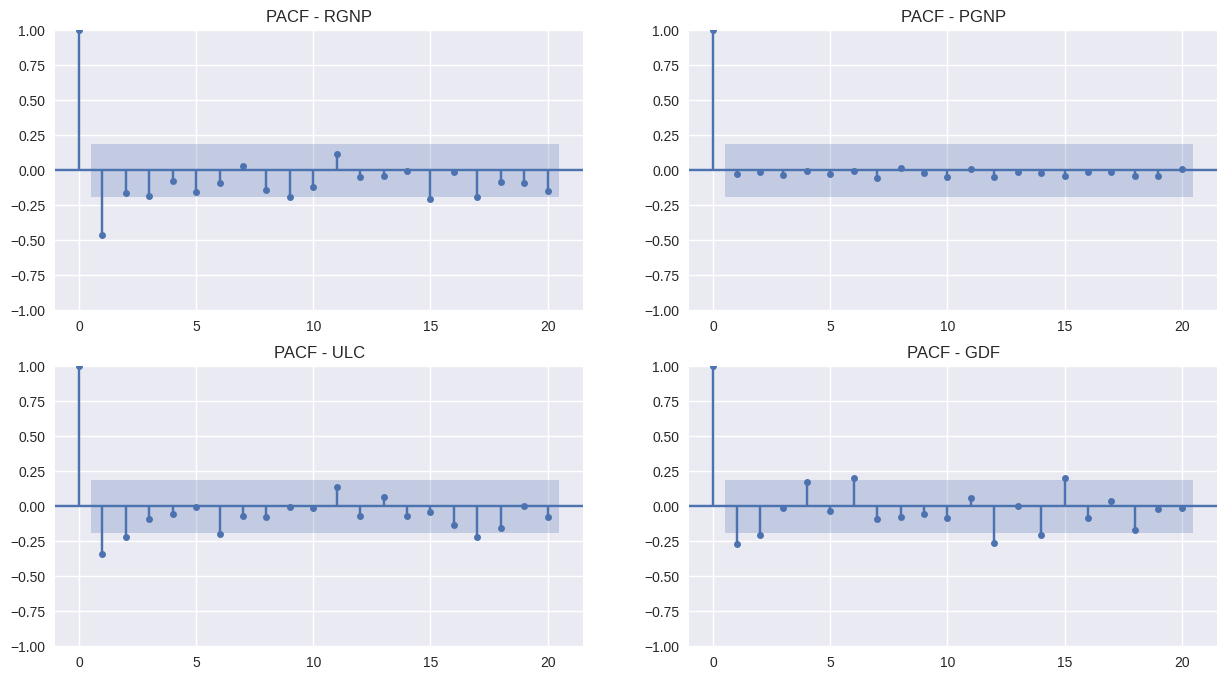

In [50]:
# Plot PACF plots
fig, ax = plt.subplots(2,2, figsize=(15,8))
plot_pacf(data_train_diff2d['rgnp'], lags=20, ax=ax[0,0],title='PACF - RGNP');
plot_pacf(data_train_diff2d['pgnp'], lags=20, ax=ax[0,1],title='PACF - PGNP');
plot_pacf(data_train_diff2d['ulc'], lags=20, ax=ax[1,0],title='PACF - ULC');
plot_pacf(data_train_diff2d['gdf'], lags=20, ax=ax[1,1],title='PACF - GDF');

In [51]:
# Automatic VAR model
model = VAR(data_train_diff2d)
x = model.select_order(maxlags=5)
x.summary()

,AIC,BIC,FPE,HQIC
0,2.088,2.190*,8.072,2.130
1,1.792,2.300,6.002,1.998*
2,1.762,2.677,5.833,2.133
3,1.536,2.858,4.669,2.071
4,1.544,3.273,4.740,2.245
5,1.367*,3.503,4.012*,2.232


In [52]:
# Optimize VAR model
results = []
for p in range(1,6,1):
        model = VARMAX(data_train_diff2d, order=(p,0)).fit(disp=False)
        aic = model.aic
        results.append([p, aic])

result_df = pd.DataFrame(results)
result_df.columns = ['p', 'AIC']
opt = result_df[result_df['AIC']==result_df['AIC'].min()]
display(opt)


,p,AIC
4,5,1395.46015


In [53]:
# Fit the optimal VAR model
best_model = VARMAX(data_train_diff2d, order=(5,0)).fit()
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:     ['rgnp', 'pgnp', 'ulc', 'gdf']   No. Observations:                  109
Model:                                     VAR(5)   Log Likelihood                -603.730
                                      + intercept   AIC                           1395.460
Date:                            Fri, 09 Feb 2024   BIC                           1648.447
Time:                                    15:09:34   HQIC                          1498.055
Sample:                                07-01-1959                                         
                                     - 07-01-1986                                         
Covariance Type:                              opg                                         
Ljung-Box (L1) (Q):     0.16, 0.02, 0.92, 0.19   Jarque-Bera (JB):   5.77, 3764.87, 12.57, 1.07
Prob(Q):                0.69, 0.89, 0.34, 0.66   Prob(JB):               0.06, 0.00, 

In [54]:
# Forecast
predictions = best_model.get_prediction(start=data_test.index[0], end=data_test.index[-1])
predictions.summary_frame()


rgnp,mean,mean_se,mean_ci_lower,mean_ci_upper
1986-10-01,24.860125,24.696221,-23.543579,73.263829
1987-01-01,-36.814882,30.023406,-95.659677,22.029913
1987-04-01,30.082244,30.507734,-29.711816,89.876303
1987-07-01,-25.707980,31.162573,-86.785500,35.369540
1987-10-01,8.361006,32.969997,-56.259000,72.981012
1988-01-01,22.566344,34.121323,-44.310220,89.442908
1988-04-01,-13.852457,35.466817,-83.366141,55.661227
1988-07-01,-12.346038,35.708151,-82.332728,57.640652
1988-10-01,5.948175,35.783626,-64.186444,76.082794
1989-01-01,1.758099,35.999745,-68.800105,72.316303


In [55]:
# Invert second-order differencing
def invert_differencing(df_train, df_forecast):
    forecasting =  pd.DataFrame()
    forecasting_1d =  pd.DataFrame()
    df_fc = predictions
    columns = df_train.columns
    for col in columns:
             forecasting_1d[col]= df_train[col].iloc[-1]-df_train[col].iloc[-2] + df_fc.predicted_mean[col].cumsum()
             forecasting[col] = df_train[col].iloc[-1] + forecasting_1d[col].cumsum()
    return forecasting

df_results = invert_differencing(data_train, predictions)
df_results


,rgnp,pgnp,ulc,gdf
1986-10-01,3745.060125,3808.508061,172.616250,116.083003
1987-01-01,3740.905368,3831.647917,174.124406,116.799481
1987-04-01,3766.832855,3854.849528,175.223533,117.444776
1987-07-01,3767.052361,3877.776590,177.189995,118.250150
1987-10-01,3775.632873,3901.015404,179.171665,119.067205
1988-01-01,3806.779730,3924.424086,180.354228,119.844408
1988-04-01,3824.074129,3947.718506,181.898060,120.623297
1988-07-01,3829.022491,3971.154683,183.783495,121.406837
1988-10-01,3839.919028,3994.682922,185.702274,122.245948
1989-01-01,3852.573663,4018.274067,187.462581,123.103005


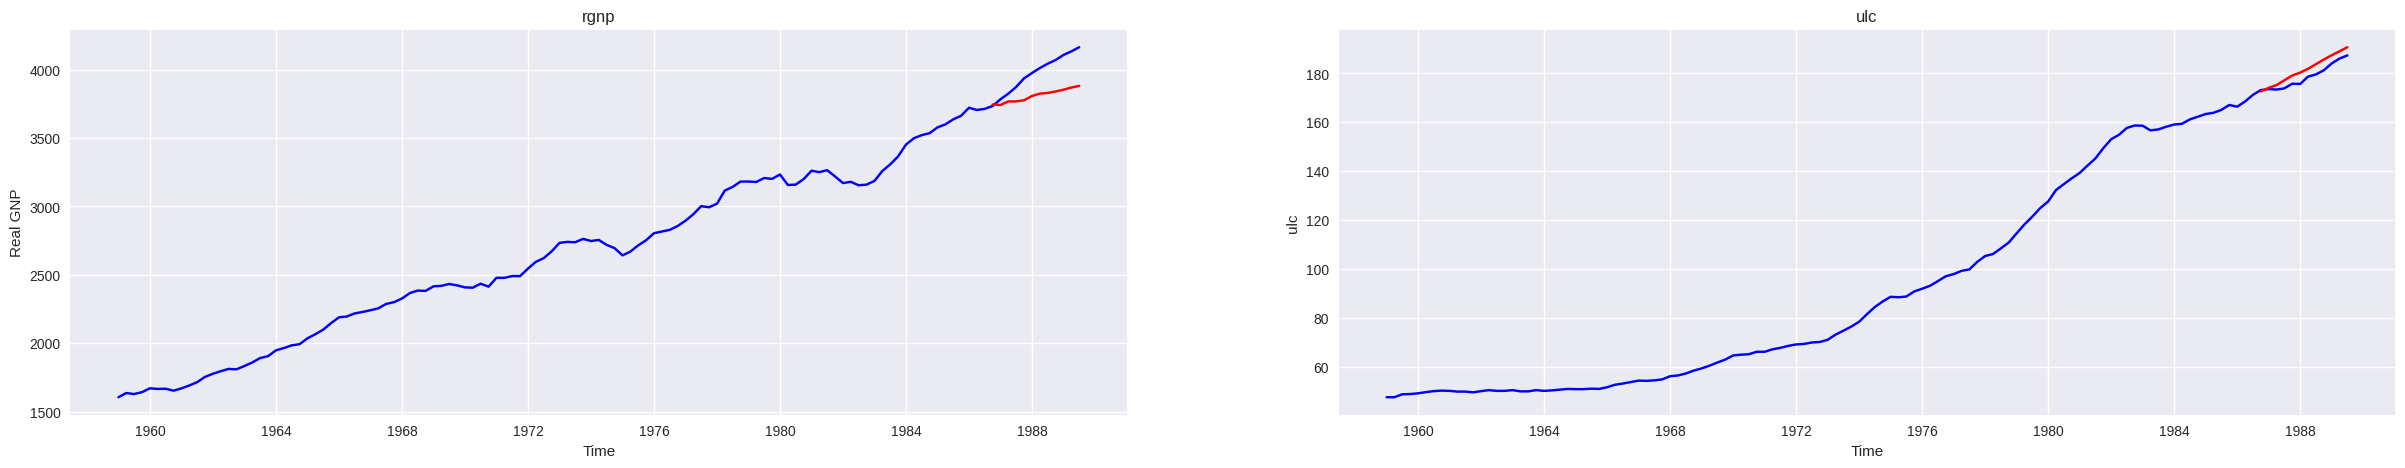

In [56]:
# Visualize the results - RGNP & ULC
fig, ax = plt.subplots(1,2, figsize=(30,5))
ax[0].plot(data['rgnp'],'-b')
ax[0].plot(df_results['rgnp'],'-r')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Real GNP')
ax[0].set_title('rgnp');

ax[1].plot(data['ulc'],'-b')
ax[1].plot(df_results['ulc'],'-r')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('ulc')
ax[1].set_title('ulc');
